# Базовые структуры данных

### Физическая реализация

Массивы - константный доступ по индексу, непрер. кусок памяти, фикс. размер. Вставка, удаление O(n), т.к. все сдвигается.   
Списки (односвязные, двусвязные) - доступ, вставка, удаление О(1).  

### Абстрактные струкутры данных

Стек (LIFO) - методы Push(key), key Top(), key Pop(), bool Empty()  
Стек с поддержкой минимума - заводится параллельный стек куда кладется новый элемент, если он меньше Top() или повторяется Push(Top()). На каждом шаге Top() указывает на минимальный элемент в целевом стеке.  
Очередь (FIFO) - методы Enqueue() / PushBack(), Dequeue() / PopFront(), bool Empty().    
- Если реализация с помощью массива, то индексы берутся по модулю длины массива (ходят по кругу).  
- Можно реализовать двумя стеками - в один элементы помещаются Enqueue(), из второго забираются Dequeue(). Если второй пустой, перед забором элемента в него перекладывается все, что накопилось в первой стеке.

Задача: 

    вход: массив чисел длины n, и число m - рамер окна просмотра
    выход: массив все минимумов в подмассивах длины m
    решение: наивное решение дает O(n*m) - все сравниваются со всеми. Через стек с минимумом - O(n+m)
    
Дерево - связный граф без циклов (n вершин, n-1 ребер, междуюбыми двумя вершинами ровно один путь). Корневое дерево - дерево с объявленным корнем.  
Способы представления:  

    1. Список родителей (индекс - это потомок, значение - индекс родителя). Родитель только один, поэтому реализуется просто списком (массивом)
    2. Список потомков (список смежностей) - по индеску это родителя ссылка на список индексов потомков. Список списков.
    3. Структура данных с полями: родитель, потомки (м.б. отдельно левый/правый), данные.   
Деревья удобно определять рекурсивно, т.к. все поддеревья являются деревьями.   
Высота дерева - максимальная длина пути от корня.   

    height(r):   
    h = 1   
    for all child c of r:   
        height(c) = max(h, 1 + height(c))  
    return h    

    printTree(r):   
    print(r)    
    for all child c of r:   
        printTree(c)    

        





### Массивы переменного размера
При необходимости увеличения размера массива это можно делать аддитивно (на n элементов) или мультипликативно (в m раз).    
- Аддитивный подход - сложность O(n^2), при увеличении от 0 до n арифмитическая прогрессия, но экономия памяти.   
- Мультипликативная релокация - сложность O(n), геометрическая прогрессия, но больше памяти. Все используют эту схему (cpp vector). Коэффициент обычно 1.5 или золотое сечение.   

#### Метод потенциалов оценки эффективности операций

Пусть Ci стоимость операции OPi, переводящей некоторую неизвестную структуру данных S из состояния s(i-1) в si. Обозначим Fi потенциал состояния si. Тогда учетная стоимость операции CUi = Ci + (Fi - F(i-1)). И тогда истинная сумма Ci = сумме CUi + (F0 - Fn). Подбор удобных F0..Fn позволяет превратить сумму CUi в константу и даст оценку эффективности операции над структурой данных.    

- На примере мультипликативной релокации:   
    l -> 2l, Fi = 2s*l, s - количество занятых ячеек, l - длина массива, потенциал - сколько осталось места для полного заполнения массива.     

        1. Добавление без релокации: s -> s+1, l -> l, Ci = 1, CUi = 1 + (2(s+1) - l - 2(s - l)) = 3    
        2. С релокацией: s = l, s -> s + 1, l -> 2l, Ci = l + 1, CUi = l + 1 + (2(l+1) - 2l) - (2l - l) = 3 
        Тогда сумма CUi = сумма Ci + (F0 - Fn) = 3m + (F0 - Fn) -> Teta(n)

    Суть примерно, сглаживание графика стоимости операций путем замены переменной и приведение его к плоскому виду.




## Задача: Расстановка скобок в коде 
Проверить, правильно ли расставлены скобки в данном коде.   
Вход. Исходный код программы.   
Выход.Проверить, верно ли расставлены скобки. Если нет,выдать индекс первой ошибки.

In [1]:
SAMPLES = "([](){([])})", "()[]}", "{{[()]]", "{{{[][][]", "{*{{}", "[[*", "{*}", "{{", "{}", "", "}", "*{}", "{{{**[][][]"
OUTPUTS = 'Success', 5, 7, 3, 3, 2, 'Success', 2, 'Success', 'Success', 1, 'Success', 3

def bracket_check(s):
    stack = list()
    for i, ch in enumerate(s, 1):
        if ch in ("(", "[", "{"):
            stack.append((i, ch))
        elif ch in (")", "]", "}"):
            if len(stack) == 0:
                return i
            _, top = stack.pop()
            if (top == "(" and ch != ")") or \
               (top == "[" and ch != "]") or \
               (top == "{" and ch != "}"):
                return i
    
    return stack[-1][0] if stack else "Success"



test = lambda func: [func(sample) == answer for (sample, answer) in zip(SAMPLES, OUTPUTS)]
test(bracket_check)

[True, True, True, True, True, True, True, True, True, True, True, True, True]

## Вычислить высоту данного дерева.    
Вход. Корневое дерево с вершинами {0, . . . , n−1}, заданное как последовательность parent0, . . . ,parentn−1, где parenti — родитель i-й вершины. n < 10^5.    
Выход. Высота дерева.

In [2]:
SAMPLES = "10\n9 7 5 5 2 9 9 9 2 -1", "5\n4 -1 4 1 1", "5\n-1 0 0 0 0", "5\n1 -1 1 1 1", "5\n4 4 4 4 -1", "5\n-1 0 1 2 3", "5\n1 -1 0 2 3", "5\n1 2 3 4 -1"
OUTPUTS = 4, 3, 2, 2, 2, 5, 5, 5

READER = [(x for x in SAMPLES[i].split('\n')) for i in range(len(SAMPLES))]                             # список генераторов входных данных
input = lambda i=0:  next(READER[i])                                                                   # для эмулятора input()


# put your python code here
from functools import lru_cache

def heightTD(parents):
    @lru_cache(maxsize=None)
    def _height(child):
        h = 1
        for ch, par in enumerate(parents):
            if par == child:
                h = max(h, 1 + _height(ch))
        return h

    return _height(parents.index(-1))
    
    
def heightN2(parents):                                    # O(n^2)
    height, n = 1, len(parents)
    stack = []

    while True:
        core = [False] * n       
        if not stack:
            for child in range(n):
                if parents[child] != -1: 
                    core[parents[child]] = True
        else:
            while stack:
                child = stack.pop()
                if parents[child] != -1:
                    core[parents[child]] = True
        for child in range(n):
            if core[child]:
                stack.append(child)
        if len(stack) > 0:
            height = height + 1
        else:
            return height

def heightRecursive(parents):
    n = len(parents)
    depths = [0] * n                                # глубина поддерева с корнем в i

    def fillDepths(child):
        if depths[child] > 0:
            return                                  # уже посчитали...
        if parents[child] == -1:
            depths[child] = 1    
            return                                  # ...или добрались до корня
        if depths[parents[child]] == 0:
            fillDepths(parents[child])              # вычислить у родителя...
        
        depths[child] = depths[parents[child]] + 1  # ...добавить потомку высоту родителя + 1

    for child in range(n):
        fillDepths(child)

    max_depth = depths[0]
    for i in range(1, n):
        max_depth = max(max_depth, depths[i])
    return max_depth

def heightIterative(parents):
    n = len(parents)
    depths = [None] * n
    max_depth = 0

    for child, parent in enumerate(parents):
        parent_stack = []
        while parent != -1 and depths[child] is None:       # пока не дойдем до корня или уже посещенной вершины
            parent_stack.append(child)
            child, parent = parent, parents[parent]
        parent_stack.append(child)                          # добавим корень
        if parent == -1:
            depth = 1
        else:
            depth = depths[child]                           # ранее найденная глубина
        while parent_stack:
            depths[parent_stack.pop()] = depth
            depth += 1                                      # ... из-за этого плюса в ретурне минус
        if max_depth < depth:
            max_depth = depth

    return max_depth - 1

k=0
def main():
    n = int(input(i=k))
    T = list(map(int, input(i=k).split()))
    print(heightIterative(T))
    

main()

# tests area
def test(func, i=0):
    n = int(input(i=i))
    T = list(map(int, input(i=i).split()))
    return func(T)

test_cases = lambda tester, func: [tester(func, i=case) == out for case, out in enumerate(OUTPUTS[1:], 1)]
test_cases(test, heightIterative)

4


[True, True, True, True, True, True, True]

heightIterative 56675033


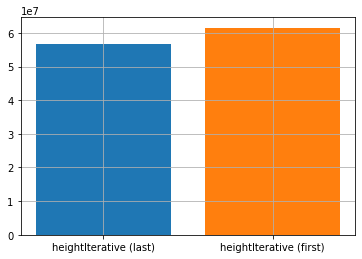

In [3]:
import sys
from time import perf_counter_ns
from matplotlib import pyplot as plt

def timeit(func, *args, n_iter=10):
    t1 = float('inf')
    for _ in range(n_iter):
        t0 = perf_counter_ns()
        func(*args)
        t1 = min(t1, perf_counter_ns() - t0)
    return t1

num = 10 ** 5       # 10**5 дает при рекурсии Ошибка сегментирования (стек памяти сброшен на диск), хотя в решальщике тест проходит
sys.setrecursionlimit(num + 1)

funcs = [heightIterative]
arg1 = [i+1 for i in range(num-1)] + [-1]
arg2 = [i - 1 for i in range(num)]


for func in funcs:
    t1 = timeit(func, arg1)
    t2 = timeit(func, arg2)
    print(func.__name__, t1)
    plt.bar(func.__name__+' (last)', t1)
    plt.bar(func.__name__+' (first)', t2)
plt.grid(True)
plt.show()


## Задача. Симуляция обработки сетевых пакетов

Вход. Размер буфера 1<= size <=10^5 и число пакетов 0<= n <=10^5, а так же две последовательности arrival 1 .. arrival n (<= 10^6) и duration 1 .. duration n (<=10^3), обозначающих время поступления и длительность обработки n пакетов. {arrival} неубывающая

Выход. Для каждого из данных n пакетов необходимо вывести время начала его обработки или −1, если пакет не был обработан (это происходит в случае, когда пакет поступает в момент, когда в буфере компьютера уже находится size пакетов).   



In [4]:
class Queue():
    def __init__(self, size, repr=0):
        self.size = size
        self.length = 0     # current len of queue
        self.cost = 0       # cost of enqueued
        self.full = False
        self.empty = True
        self._queue = [-1] * self.size
        self._back = 0      # points empty to push
        self._front = 0     # points not empty to pop
        self._repr = repr

    def front(self):
        return self._queue[self._front]

    def pushBack(self, key):
        if self.full:
            return -1
        else:
            self._queue[self._back] = key       
            self._back = (self.size + self._back - 1) % self.size
            self.length += 1
            self.cost += key
            self.full = True and (self.length == self.size)
            self.empty = False and self.empty
            return self.cost - key
            

    def popFront(self):
        if not self.empty:
            key = self._queue[self._front]
            self._queue[self._front] = -1
            self._front = (self.size + self._front - 1) % self.size
            self.length -= 1
            self.cost -= key
            self.empty = True and (self.length == 0)
            self.full = False and self.full


    def update(self, d_time):
        if d_time >= self.cost:
            self.__init__(self.size, repr=self._repr)       # release queue
        else:
            while d_time:
                if self.front() <= d_time:                  # pop
                    d_time = d_time - self.front()
                    self.popFront()
                else:                                       # 'partial' pop
                    self._queue[self._front] -= d_time
                    self.cost -= d_time     
                    d_time = 0

        if self._repr: print("\n{}".format(self), end=' ')

    
    def __repr__(self):
        l = self._repr
        pretify = lambda x: "[{}]".format(' '*(l - len(str(x))) + str(x) if x >= 0 else ' '*l)
        Q = ''
        i = self._front
        while i > self._front - self.size:
            Q += pretify(self._queue[i])
            i -= 1
        return "{} {:>3}/{:<3} ".format(Q, self.length, self.size)


In [5]:
import random

size, n = 10, 20

A = sorted([random.randint(0, n) for _ in range(n)])    # время поступления
D = [random.randint(0, n//5) for _ in range(n)]         # длительность обслуживиная
q = Queue(size, repr=len(str(n)))

print("Состояние на момент послупления нового запроса -> одиж.время начала обслуживания")
if n > 0:
    q.update(A[0] - 0)
    print("arr:{:>3} dur:{:>3} ".format(A[0], D[0]), end=' -> start: ')
    Di = q.pushBack(D[0])
    Ai = A[0] + Di if Di != -1 else -1
    print(Ai, end= ' ')
    for i in range(1, n):
        q.update(A[i] - A[i-1])
        print("arr:{:>3} dur:{:>3} ".format(A[i], D[i]), end=' -> start: ')
        Di = q.pushBack(D[i])
        Ai = A[i] + Di if Di != -1 else -1
        print(Ai, end= ' ')


Состояние на момент послупления нового запроса -> одиж.время начала обслуживания

[  ][  ][  ][  ][  ][  ][  ][  ][  ][  ]   0/10   arr:  3 dur:  1  -> start: 3 
[  ][  ][  ][  ][  ][  ][  ][  ][  ][  ]   0/10   arr:  5 dur:  4  -> start: 5 
[ 3][  ][  ][  ][  ][  ][  ][  ][  ][  ]   1/10   arr:  6 dur:  4  -> start: 9 
[ 2][ 4][  ][  ][  ][  ][  ][  ][  ][  ]   2/10   arr:  7 dur:  3  -> start: 13 
[ 4][ 3][  ][  ][  ][  ][  ][  ][  ][  ]   2/10   arr:  9 dur:  2  -> start: 16 
[ 4][ 3][ 2][  ][  ][  ][  ][  ][  ][  ]   3/10   arr:  9 dur:  0  -> start: 18 
[ 3][ 3][ 2][ 0][  ][  ][  ][  ][  ][  ]   4/10   arr: 10 dur:  3  -> start: 18 
[ 3][ 3][ 2][ 0][ 3][  ][  ][  ][  ][  ]   5/10   arr: 10 dur:  0  -> start: 21 
[ 2][ 3][ 2][ 0][ 3][ 0][  ][  ][  ][  ]   6/10   arr: 11 dur:  0  -> start: 21 
[ 2][ 3][ 2][ 0][ 3][ 0][ 0][  ][  ][  ]   7/10   arr: 11 dur:  1  -> start: 21 
[ 2][ 3][ 2][ 0][ 3][ 0][ 0][ 1][  ][  ]   8/10   arr: 11 dur:  0  -> start: 22 
[ 3][ 2][ 0][ 3][ 0][ 0][ 1][ 

In [6]:
def queue_test(size, intens, mean, d_mean, n_req=10000):                         # intens - поступление (пак/сек), mean - обработка (сек/пакет), d_mean - разброс обработки (%)
    # возвращает процент дропнутых пакетов и среднюю заполненность очереди
    A = sorted([random.randint(0, n_req // intens) for _ in range(n_req)])      # времена поступления 
    dm =  mean * d_mean // 100
    D = [random.randint(mean - dm, mean + dm ) for _ in range(n_req)]    # длительность обслуживания
    dropped = 0
    S = [0] * n_req

    q = Queue(size)
    
    q.update(A[0] - 0)
    Di = q.pushBack(D[0])
    Ai = A[0] + Di if Di != -1 else -1
    if Ai == -1: dropped += 1
    S[0] = q.length
    for i in range(1, n_req):
        q.update(A[i] - A[i-1])
        Di = q.pushBack(D[i])
        Ai = A[i] + Di if Di != -1 else -1
        S[i] = q.length
        if Ai == -1: dropped += 1
    
    dropped = dropped / n_req
    workload = sum(S) / len(S)
    return dropped, workload

k, j = 2, 32
size    = [x for x in range(k,j)]
intens  = [y for y in range(k,j)]
mean    = [x-k+1 for x in intens]
d_mean  = [0.5 for x in mean]

# xy = list(product(intens, mean))
# xs = [i for (i, m) in xy]
# ys = [m for (i, m) in xy]
# zs = [queue_test(i//m+2, i, m, 0.3)[1] for (i, m) in xy]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(ys, xs, zs, s=10)
# plt.show()


           


In [7]:
SAMPLES = "1 0\n", "1 1\n0 0", "1 1\n0 1", "1 2\n0 1\n0 1", "1 2\n0 1\n1 1", "1 5\n999999 1\n1000000 0\n1000000 1\n1000000 0\n1000000 0"
OUTPUTS = '', '0', '0', '0\n1', '0\n1', '999999 1000000 1000000 -1 -1'

READER = [(x for x in SAMPLES[i].split('\n')) for i in range(len(SAMPLES))]                             # список генераторов входных данных
input = lambda i=0:  next(READER[i])                                                                   # для эмулятора input()
case = 5

size, n = list(map(int, input(i=case).split()))

q = Queue(size)


if n > 0:
    ai, di = list(map(int, input(i=case).split()))
    q.update(ai - 0)
    Di = q.pushBack(di)
    Ai = (ai + Di) if (Di != -1) else -1
    print(Ai)
    for i in range(1, n):
        ai1, di = list(map(int, input(i=case).split()))
        q.update(ai1 - ai)
        Di = q.pushBack(di)
        Ai = (ai1 + Di) if (Di != -1) else -1
        print(Ai)
        ai = ai1


999999
1000000
1000000
-1
-1


# Стек с поддержкой максимума   
Реализовать стек с поддержкой операций push, pop и max.   
Вход. Последовательность запросов push, pop и max.   
Выход. Для каждого запроса max вывести максимальное число, находящееся на стеке.  
Формат входа. Первая строка содержит число запросов q. Каждая из последующих q строк задаёт запрос в одном из следующих форматов: push v, pop, or max.  
Формат выхода. Для каждого запроса max выведите (в отдельной строке) текущий максимум на стеке.  
Ограничения. 1 ≤ q ≤ 400 000, 0 ≤ v ≤ 100 000.

In [8]:
import sys
from array import array
from io import StringIO

class StackArray():
    def __init__(self):
        self._stack = array('l')
        self._max = array('l')
        self._commands = {'push': self.push, 'pop': self.pop, 'max': self.max}
        self._buffer = StringIO()
    
    def push(self, key):
        self._stack.append(key)
        if len(self._max) == 0:
            self._max.append(key)
        else:
            self._max.append(max(self._max[-1], key))
    
    def pop(self, *args):
        self._max.pop()
        return self._stack.pop()
    
    def max(self, *args):
        print(self._max[-1], file=self._buffer)

    def run(self, command):
        cmd = command.split()[0]
        arg = int(command.split()[1]) if cmd == 'push' else None
        self._commands[cmd](arg)

    def flush(self):
        sys.stdout.write(self._buffer.getvalue())
        sys.stdout.flush()

In [9]:
SAMPLE = """5
push 2
push 1
max
pop
max"""

READER = (x for x in SAMPLE.split('\n'))
input = lambda: next(READER)             


stack = StackArray()

n = int(input())
for i in range(n):
    stack.run(input())
stack.flush()


2
2


# Максимум в скользящем окне  

Найти максимум в каждом окне размера m данного массива чисел A\[1..n].  
Вход. Массив чисел A\[1..n] и число 1 ≤ m ≤ n.  
Выход. Максимум подмассива A\[i..i + m − 1] для всех 1 ≤ i ≤ n − m + 1.  

Формат входа. Первая строка входа содержит число n, вторая — массив A\[1..n], третья — число m.  
Формат выхода. n − m + 1 максимумов, разделённых пробелами. 
Ограничения. 1 ≤ n ≤ 10^5 , 1 ≤ m ≤ n, 0 ≤ A\[i] ≤ 10^5 для всех 1 ≤ i ≤ n.


In [10]:
from collections import namedtuple

Item = namedtuple('Item', ['top', 'max'])

class StackMax():
    def __init__(self):
        self.stack = list()
    
    def __len__(self):
        return len(self.stack)

    def push(self, key):
        self.stack.append(Item(key, max(self.maximum(), key)))
    
    def pop(self):
        return self.stack.pop().top if self.stack else -1
    
    def maximum(self):
        return self.stack[-1].max if self.stack else -1


class QueueMax():
    def __init__(self, size=1):
        self.size = size
        self.head = StackMax()
        self.tail = StackMax()
    
    def shift(self, key):
        if len(self.head) < self.size:
            self.enqueue(key)
        else:
            for _ in range(self.size):
                self.tail.push(self.head.pop())
            self.enqueue(key)
        if len(self.tail) > 0:
            self.dequeue()

        lack = self.size - len(self.tail) - len(self.head)
        return -1 if lack else self.maximum()

    def enqueue(self, key):
        self.head.push(key)
    
    def dequeue(self):
        return self.tail.pop()
    
    def maximum(self):
        return max(self.head.maximum(), self.tail.maximum())


In [11]:
SAMPLE = "8\n2 7 3 1 5 2 6 2\n4", "3\n2 1 5\n1", "3\n2 3 9\n3"
OUTPUT = "7 7 5 6 6", "2 1 5", "9"
READER = (x for x in SAMPLE[0].split('\n'))
input = lambda: next(READER)    

n = int(input())
A = list(map(int, input().split()))
m = int(input())

mover = QueueMax(size=m)
for val in A:
    maximum = mover.shift(val)
    if maximum != -1:
        print(maximum, end=' ')


7 7 5 6 6 

## Полезность про замер времени в юпитере

In [12]:
import numpy as np

np.random.seed(0)
values = np.random.randint(1, 100, size=100000)
def get_reciprocal(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0/values[i]
        
%timeit get_reciprocal(values)

180 ms ± 4.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
import random
values = [random.randint(1, 100) for _ in range(100000)]
def get_reciprocal(values):
    output = [0] * len(values)
    for i in range(len(values)):
        output[i] = 1.0 / values[i]

%timeit get_reciprocal(values)

9.94 ms ± 523 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
values = [random.randint(1, 100) for _ in range(100000)]

%timeit output = list(map(lambda x: 1.0/x, values))

8.58 ms ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
np.random.seed(0)
values = np.random.randint(1, 100, size=100000)

%timeit result = 1.0/values

320 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
